In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import Area_Avg as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import scipy.stats as stats

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
#load in cloud feedbacks and dimensions as needed
Models = ['5SST','5SSTu']
props = ['Standard', 'Amount', 'Altitude', 'Optical Depth', 'Residual', 'Sum']

presc_sw = {}
presc_lw = {}
for m in range(2):
    presc_sw[Models[m]] = {}
    presc_lw[Models[m]] = {}
    for p in range(6):
        presc_sw[Models[m]][props[p]] = pk.load(open(\
        'Data/CanESM5_p2/Custom/Fluxes/CanESM5_p2_Custom_TrCLsw_FB_MZdecomp_Grid.pi','rb'))\
        [props[p]][Models[m]]
    
        presc_lw[Models[m]][props[p]] = pk.load(open(\
        'Data/CanESM5_p2/Custom/Fluxes/CanESM5_p2_Custom_TrCLlw_FB_MZdecomp_Grid.pi','rb'))\
        [props[p]][Models[m]]

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

net_presc_cloud = np.nanmean(\
    presc_lw['5SST']['Standard']['All']+presc_sw['5SST']['Standard']['All'],axis=0).reshape(64*128)
swamt_presc = np.nanmean(presc_sw['5SST']['Amount']['Low'],axis=0).reshape(64*128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [3]:
coupled_cld_sw = pk.load(open(\
    'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
coupled_cld_lw = pk.load(open(\
    'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

net_coupled_cloud = (coupled_cld_sw['Standard']['All']+coupled_cld_lw['Standard']['All']).reshape(64*128)
swamt_coupled = coupled_cld_sw['Amount']['Low'].reshape(64*128)

In [4]:
r_netcld, p_netcld = stats.pearsonr(net_coupled_cloud,net_presc_cloud)
print('r-value - ',round(r_netcld,3),'\n p-value = ',p_netcld)

r-value -  0.855 
 p-value =  0.0


In [5]:
r_swamt, p_swamt = stats.pearsonr(swamt_coupled,swamt_presc)
print('r-value - ',round(r_swamt,3),'\n p-value = ',p_swamt)

r-value -  0.883 
 p-value =  0.0


In [6]:
land_mask = np.isnan(np.mean(pk.load(\
    open('Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))
land_valid = np.isfinite(np.mean(pk.load(\
    open('Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))

exps = ['iga-sst-1xco2','iga-sst-4xco2','idj-sst-4xco2',\
        'iga-dsst-4xco2','5pi-sst-1xco2','5a4-sst-4xco2','5pi-dsst-4xco2']

Source = 'Data/CanESM5_p2/Custom/Climatology/'
SST_presc = dict()
for i in range(len(exps)):
    SST_presc[exps[i]] = pk.load(open(Source+'CanESM5_p2_'+exps[i]+'_tas_Climo.pi','rb'))

dSST_presc = np.nanmean((SST_presc['5a4-sst-4xco2']-SST_presc['5pi-sst-1xco2']),axis=0)
tas_presc = dSST_presc.reshape(64*128)
SST_presc_plot = np.concatenate((dSST_presc[:,64:],dSST_presc[:,0:64]),axis=1)
SST_presc_plot,lon_cyc = add_cyclic_point(SST_presc_plot,lon)

In [7]:
tas_coupled = pk.load(open('Data/CanESM5_p2/ERF/CanESM5_p2_TAS_Grid.pi','rb')).reshape(64*128)

In [52]:
r_tas, p_tas = stats.pearsonr(tas_coupled,tas_presc)
print('r-value - ',round(r_tas,3),'\n p-value = ',p_tas)

r-value -  0.997 
 p-value =  0.0


In [42]:
tas_coupled_gam = np.average(tas_coupled.reshape(64,128),weights=coslat)
tas_presc_gam = np.average(tas_presc.reshape(64,128),weights=coslat)

net_coupled_cloud_gam = np.average(net_coupled_cloud.reshape(64,128),weights=coslat)
net_presc_cloud_gam = np.average(net_presc_cloud.reshape(64,128),weights=coslat)

swamt_coupled_gam = np.average(swamt_coupled.reshape(64,128),weights=coslat)
swamt_presc_gam = np.average(swamt_presc.reshape(64,128),weights=coslat)

In [18]:
tas_coupled_plot = np.concatenate((tas_coupled.reshape(64,128)[:,64:],\
                                  tas_coupled.reshape(64,128)[:,0:64]),axis=1)
tas_coupled_plot,lon_cyc = add_cyclic_point(tas_coupled_plot,lon)

tas_presc_plot = np.concatenate((tas_presc.reshape(64,128)[:,64:],\
                                  tas_presc.reshape(64,128)[:,0:64]),axis=1)
tas_presc_plot,lon_cyc = add_cyclic_point(tas_presc_plot,lon)

In [19]:
net_coupled_cloud_plot = np.concatenate((net_coupled_cloud.reshape(64,128)[:,64:],\
                                  net_coupled_cloud.reshape(64,128)[:,0:64]),axis=1)
net_coupled_cloud_plot,lon_cyc = add_cyclic_point(net_coupled_cloud_plot,lon)

net_presc_cloud_plot = np.concatenate((net_presc_cloud.reshape(64,128)[:,64:],\
                                  net_presc_cloud.reshape(64,128)[:,0:64]),axis=1)
net_presc_cloud_plot,lon_cyc = add_cyclic_point(net_presc_cloud_plot,lon)

In [20]:
swamt_coupled_plot = np.concatenate((swamt_coupled.reshape(64,128)[:,64:],\
                                  swamt_coupled.reshape(64,128)[:,0:64]),axis=1)
swamt_coupled_plot,lon_cyc = add_cyclic_point(swamt_coupled_plot,lon)

swamt_presc_plot = np.concatenate((swamt_presc.reshape(64,128)[:,64:],\
                                  swamt_presc.reshape(64,128)[:,0:64]),axis=1)
swamt_presc_plot,lon_cyc = add_cyclic_point(swamt_presc_plot,lon)

In [29]:
np.max(tas_coupled)

26.097629004584444

In [32]:
FB_bounds = np.arange(-8,8.1,1)
FB_bounds_ticks = np.arange(-8,8.1,2)
cmap = plt.cm.RdBu_r
FB_norm = mpl.colors.BoundaryNorm(FB_bounds, cmap.N)

TS_bounds = np.arange(-30,30,2.5)
TS_bounds_ticks = np.arange(-30,30,5)
cmap = plt.cm.RdBu_r
TS_norm = mpl.colors.BoundaryNorm(TS_bounds, cmap.N)

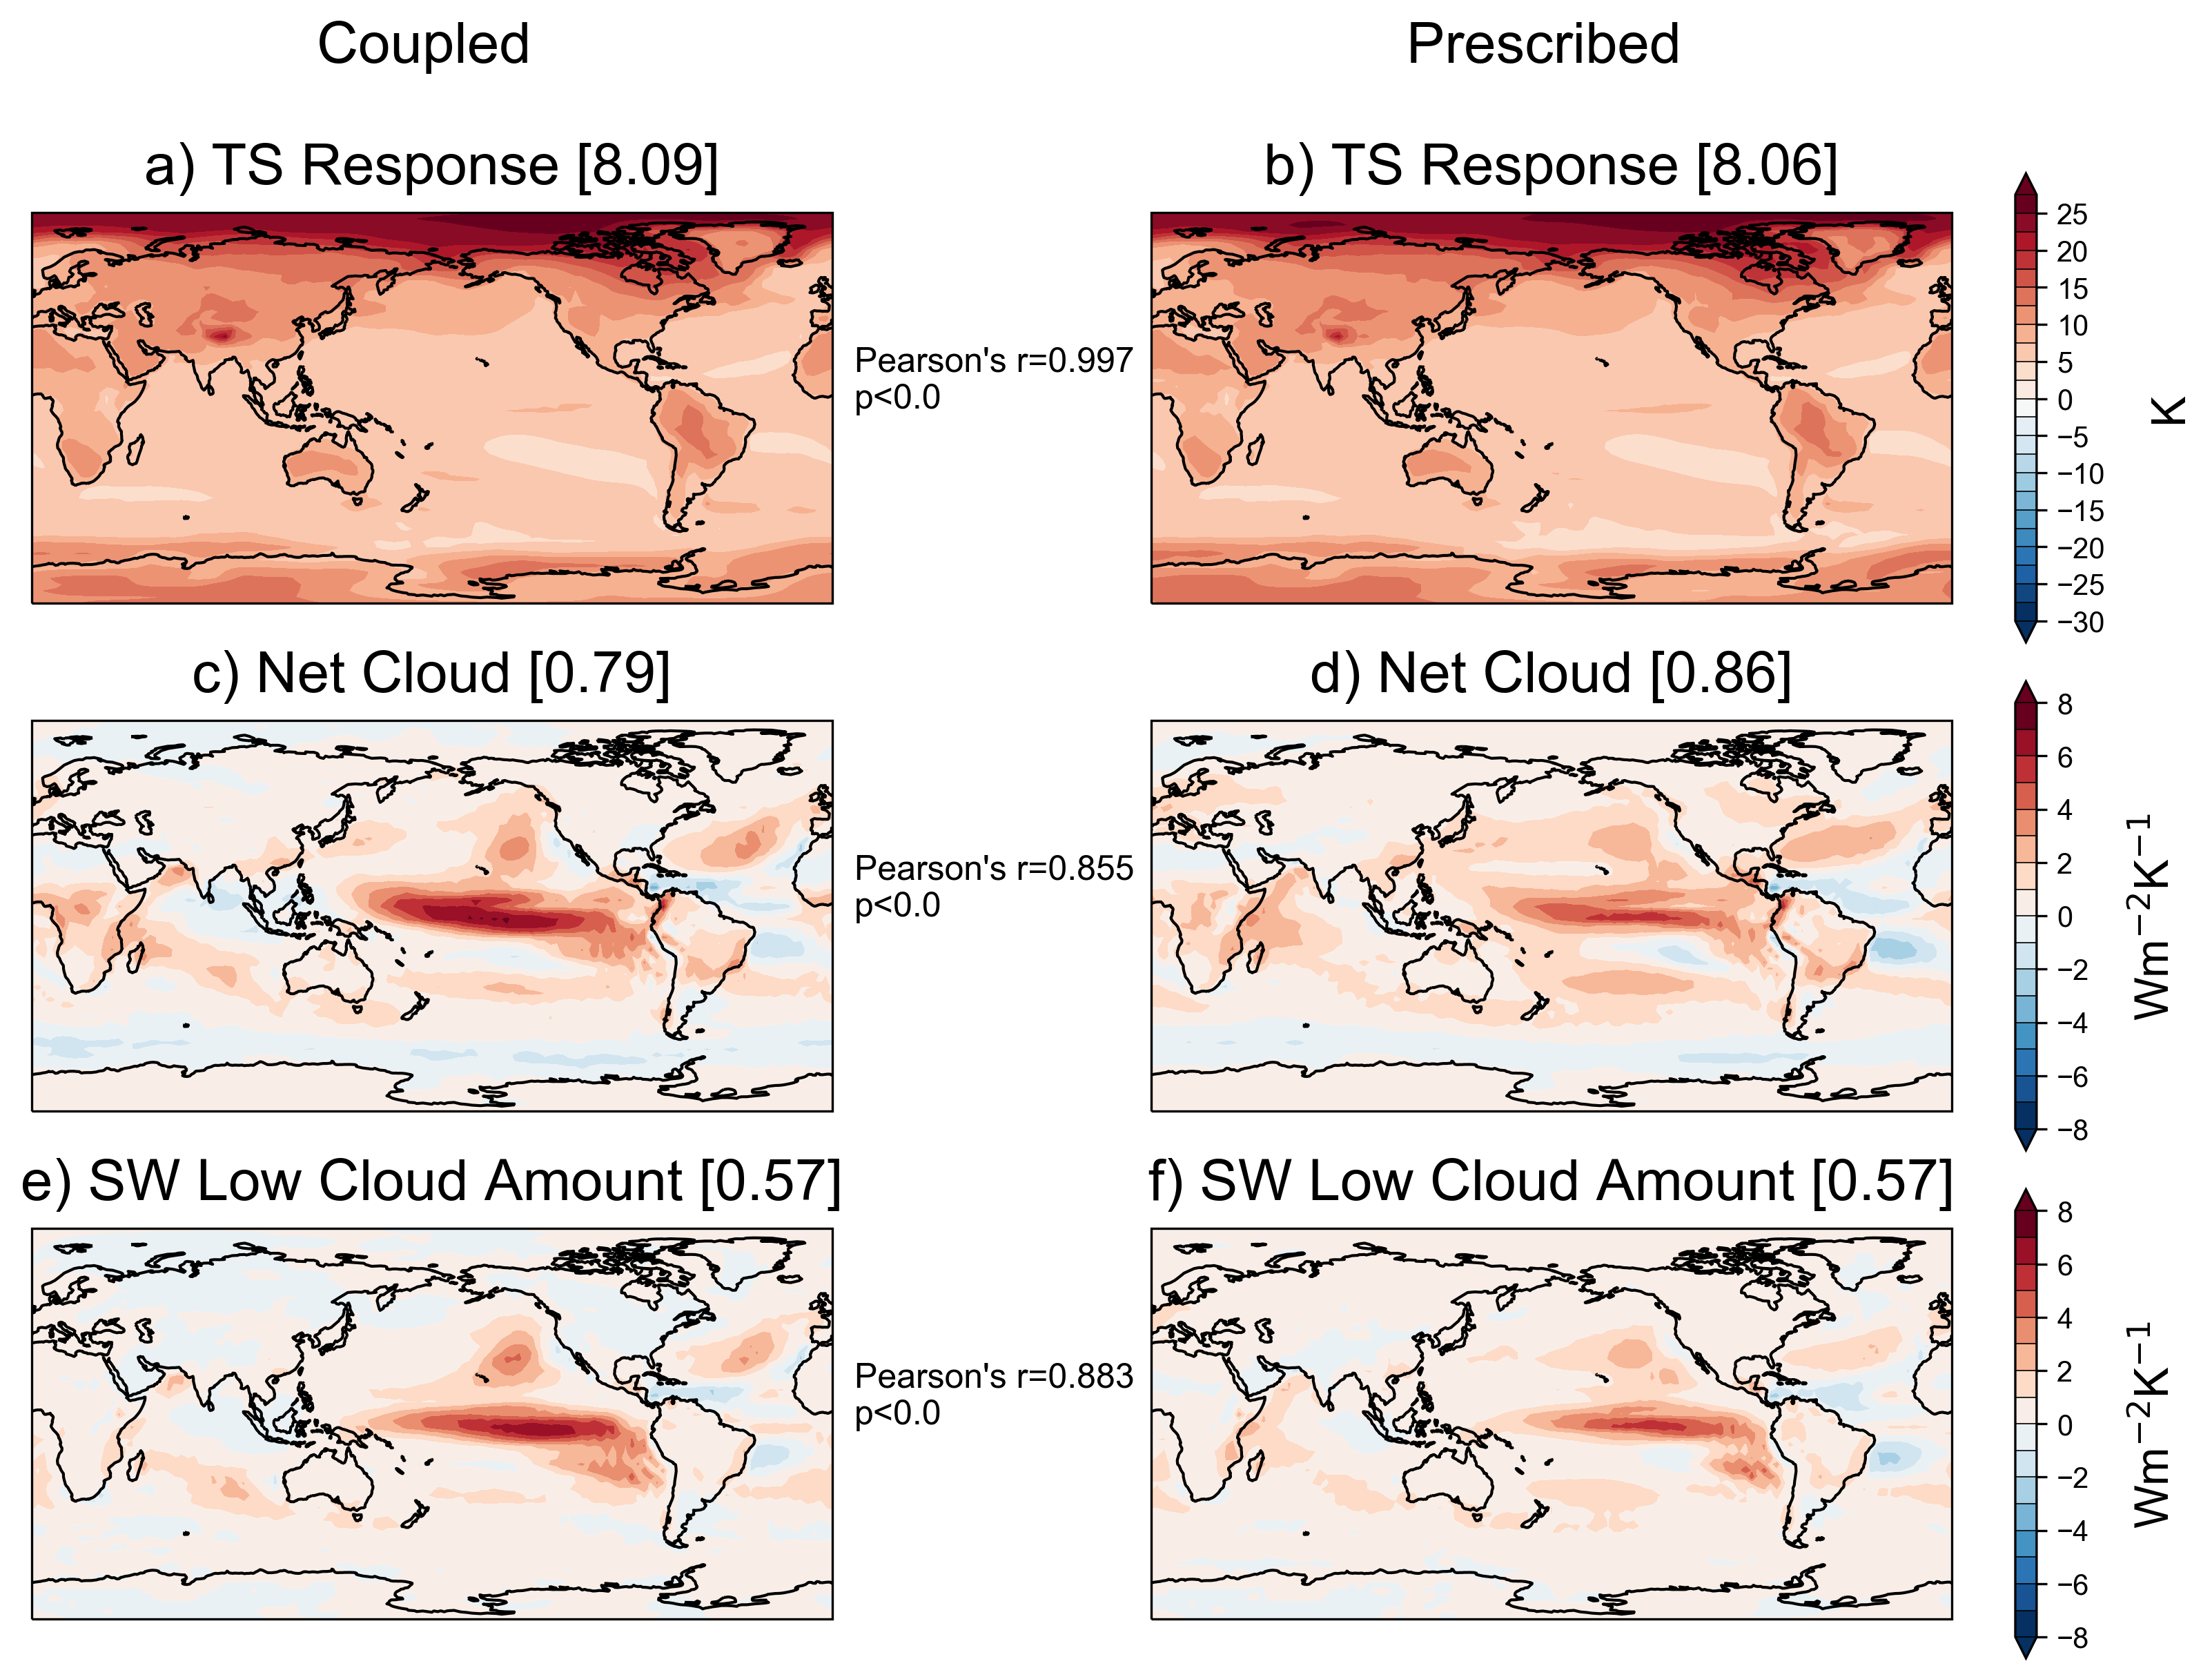

In [57]:
fig = plt.figure(figsize=(15,9),dpi=300)

#coupled TS response
ax = plt.subplot(321,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('Coupled \n\na) TS Response [{}]'.format(round(tas_coupled_gam,2)),fontsize=20,pad=10)
im = ax.contourf(lon_cyc,lat,tas_coupled_plot,TS_bounds,cmap=cmap,norm=TS_norm,extend='both')
ax.coastlines()
#cbar = plt.colorbar(im,ticks=TS_bounds_ticks,drawedges=True,shrink=1.2)
#cbar.set_label('K',labelpad=15,fontsize=16)
plt.text(190,0,"Pearson's r={}\np<{}".format(round(r_tas,3),round(p_tas,2)),fontsize=12)

#prescribed TS response
ax1 = plt.subplot(322,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('Prescribed \n\nb) TS Response [{}]'.format(round(tas_presc_gam,2)),fontsize=20,pad=10)
im1 = ax1.contourf(lon_cyc,lat,tas_presc_plot,TS_bounds,cmap=cmap,norm=TS_norm,extend='both')
ax1.coastlines()
cbar_1 = plt.colorbar(im1,ticks=TS_bounds_ticks,drawedges=True,shrink=1.2)
cbar_1.set_label('K',labelpad=15,fontsize=16)

#coupled net cloud response
ax2 = plt.subplot(323,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('c) Net Cloud [{}]'.format(round(net_coupled_cloud_gam,2)),fontsize=20,pad=10)
im2 = ax2.contourf(lon_cyc,lat,net_coupled_cloud_plot,FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax2.coastlines()
#cbar_2 = plt.colorbar(im2,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
#cbar_2.set_label('K',labelpad=15,fontsize=16)
plt.text(190,0,"Pearson's r={}\np<{}".format(round(r_netcld,3),round(p_netcld,2)),fontsize=12)

#prescribed net cloud response
ax3 = plt.subplot(324,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_title('d) Net Cloud [{}]'.format(round(net_presc_cloud_gam,2)),fontsize=20,pad=10)
im3 = ax3.contourf(lon_cyc,lat,net_presc_cloud_plot,FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax3.coastlines()
cbar_3 = plt.colorbar(im3,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_3.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)  

#coupled low amount cloud response
ax4 = plt.subplot(325,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_title('e) SW Low Cloud Amount [{}]'.format(round(swamt_coupled_gam,2)),fontsize=20,pad=10)
im4 = ax4.contourf(lon_cyc,lat,swamt_coupled_plot,FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax4.coastlines()
#cbar_4 = plt.colorbar(im4,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
#cbar_4.set_label('K',labelpad=15,fontsize=16)
plt.text(190,0,"Pearson's r={}\np<{}".format(round(r_swamt,3),round(p_swamt,2)),fontsize=12)

#prescribed low amount cloud response
ax5 = plt.subplot(326,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_title('f) SW Low Cloud Amount [{}]'.format(round(swamt_presc_gam,2)),fontsize=20,pad=10)
im5 = ax5.contourf(lon_cyc,lat,swamt_presc_plot,FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax5.coastlines()
cbar_5 = plt.colorbar(im5,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_5.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)  


plt.subplots_adjust(wspace=-0.1,hspace=0.3)

plt.savefig('Coupled_amip_pCor.png',bbox_inches='tight')